# 8.1 성능 최적화

## 8.1.1 데이터를 사용한 성능 최적화

In [1]:
# 최대한 많은 데이터 수집하기
# 데이터 생성하기
# 데이터 범위 조정하기

## 8.1.2 알고리즘을 이용한 성능 최적화

## 8.1.3 알고리즘 튜닝을 위한 성능 최적화

In [2]:
# Diagnosis : 모델을 훈련시킬 때 성능 향상이 어느 순간 멈추었다면 원인을 분석해야 함
# weights : 가중치에 대한 초깃값을 어떻게 정할 것인가?
# learning rate
# activation function
# Batch & Epochs
# Optimizer & loss function
# Network Topology

## 8.1.4 앙상블을 이용한 성능 최적화

# 8.2 하드웨어를 이용한 성능 최적화

## 8.2.1 CPU와 GPU 사용의 차이

## 8.2.2 GPU를 이용한 성능 최적화

# 8.3 Hyperparameter를 이용한 성능 최적화

## 8.3.1 Batch Normalization을 이용한 성능 최적화

In [3]:
# 정규화 : feature scaling -> MinMaxScaler() -> feature 값들을 0과 1 사이의 값으로 조정한다.
# 규제화 : Dropout & Early Stopping
# 표준화 : 기존 데이터의 평균을 0, 표준편차를 1로 만든다.
# 배치 정규화 : 

In [4]:
# 라이브러리 호출 및 데이터셋 내려받기

import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [5]:
# 데이터프레임에 데이터셋 저장

df = pd.DataFrame(iris.data, columns=iris.feature_names)
df = df.astype(float)
df['label'] = iris.target
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [6]:
# 원-핫 인코딩 적용

label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
df.drop(['label'], axis=1, inplace=True)

In [7]:
# 데이터셋 분류

X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
y = np.asarray(y)

In [8]:
# 데이터셋 분리

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.20
)

In [9]:
# 배치 정규화가 적용되지 않은 모델 생성

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization

model1 = Sequential([
    Dense(64, input_shape=(4,), activation='relu'),
    Dense(128, activation='relu'),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
]);
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                320       
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 37,763
Trainable params: 37,763
Non-traina

In [10]:
# 모델 훈련

model1.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history1 = model1.fit(
    X_train,
    y_train,
    epochs=1000,
    validation_split=0.25,
    batch_size=40,
    verbose=2
)

Epoch 1/1000
3/3 - 6s - loss: 1.1212 - accuracy: 0.5444 - val_loss: 0.9461 - val_accuracy: 0.9667 - 6s/epoch - 2s/step
Epoch 2/1000
3/3 - 0s - loss: 0.9214 - accuracy: 0.8111 - val_loss: 0.8447 - val_accuracy: 0.6667 - 102ms/epoch - 34ms/step
Epoch 3/1000
3/3 - 0s - loss: 0.8090 - accuracy: 0.6889 - val_loss: 0.7405 - val_accuracy: 0.6667 - 141ms/epoch - 47ms/step
Epoch 4/1000
3/3 - 0s - loss: 0.7056 - accuracy: 0.6889 - val_loss: 0.6520 - val_accuracy: 0.6667 - 124ms/epoch - 41ms/step
Epoch 5/1000
3/3 - 0s - loss: 0.6059 - accuracy: 0.6889 - val_loss: 0.5664 - val_accuracy: 0.6667 - 87ms/epoch - 29ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.5170 - accuracy: 0.6889 - val_loss: 0.4758 - val_accuracy: 0.7333 - 84ms/epoch - 28ms/step
Epoch 7/1000
3/3 - 0s - loss: 0.4399 - accuracy: 0.8667 - val_loss: 0.4145 - val_accuracy: 0.9667 - 138ms/epoch - 46ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.3801 - accuracy: 0.9778 - val_loss: 0.3588 - val_accuracy: 0.9333 - 98ms/epoch - 33ms/step
Epoch 9/1000
3/3

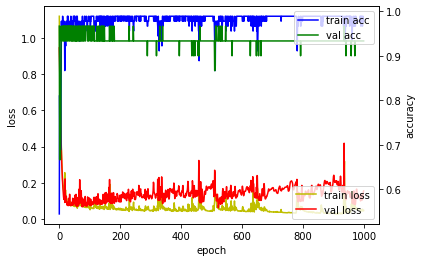

In [11]:
# 훈련 결과 시각화

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(history1.history['loss'], 'y', label='train loss')
loss_ax.plot(history1.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history1.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history1.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [12]:
# 정확도와 손실 정보 표현

loss_and_metrics = model1.evaluate(X_test, y_test)
print('## 손실과 정확도 평가 ##')
print(loss_and_metrics)

1/1 [==============================] - 0s 23ms/step - loss: 0.0219 - accuracy: 1.0000
## 손실과 정확도 평가 ##
[0.021885398775339127, 1.0]


In [13]:
# 배치 정규화가 적용된 모델

from tensorflow.keras.initializers import RandomNormal, Constant

model2 = Sequential([
    Dense(64, input_shape=(4,), activation='relu'),
    BatchNormalization(),
    
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dense(64, activation='relu'),
    BatchNormalization(
        momentum=0.95,
        epsilon=0.005,
        beta_initializer=RandomNormal(mean=0.0, stddev=0.05),
        gamma_initializer=Constant(value=0.9)
    ),
    Dense(3, activation='softmax')
]);
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                320       
                                                                 
 batch_normalization (BatchN  (None, 64)               256       
 ormalization)                                                   
                                                                 
 dense_7 (Dense)             (None, 128)               8320      
                                                                 
 batch_normalization_1 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 batch_normalization_2 (Batc  (None, 128)             

In [14]:
# 모델 훈련

model2.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

history2 = model2.fit(
    X_train,
    y_train,
    epochs=1000,
    validation_split=0.25,
    batch_size=40,
    verbose=2
)

Epoch 1/1000
3/3 - 2s - loss: 2.0787 - accuracy: 0.3111 - val_loss: 1.0802 - val_accuracy: 0.4333 - 2s/epoch - 735ms/step
Epoch 2/1000
3/3 - 0s - loss: 0.4559 - accuracy: 0.8333 - val_loss: 1.0450 - val_accuracy: 0.5333 - 43ms/epoch - 14ms/step
Epoch 3/1000
3/3 - 0s - loss: 0.2405 - accuracy: 0.9556 - val_loss: 1.0220 - val_accuracy: 0.3667 - 42ms/epoch - 14ms/step
Epoch 4/1000
3/3 - 0s - loss: 0.1158 - accuracy: 0.9889 - val_loss: 1.0111 - val_accuracy: 0.3333 - 40ms/epoch - 13ms/step
Epoch 5/1000
3/3 - 0s - loss: 0.1214 - accuracy: 0.9556 - val_loss: 1.0123 - val_accuracy: 0.3333 - 39ms/epoch - 13ms/step
Epoch 6/1000
3/3 - 0s - loss: 0.0878 - accuracy: 0.9778 - val_loss: 1.0188 - val_accuracy: 0.3333 - 39ms/epoch - 13ms/step
Epoch 7/1000
3/3 - 0s - loss: 0.0787 - accuracy: 0.9778 - val_loss: 1.0325 - val_accuracy: 0.3333 - 45ms/epoch - 15ms/step
Epoch 8/1000
3/3 - 0s - loss: 0.0698 - accuracy: 0.9889 - val_loss: 1.0541 - val_accuracy: 0.3333 - 42ms/epoch - 14ms/step
Epoch 9/1000
3/3 

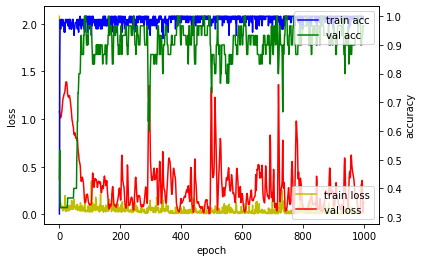

In [15]:
# 훈련 결과 시각화

%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()
loss_ax.plot(history2.history['loss'], 'y', label='train loss')
loss_ax.plot(history2.history['val_loss'], 'r', label='val loss')
acc_ax.plot(history2.history['accuracy'], 'b', label='train acc')
acc_ax.plot(history2.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='lower right')
acc_ax.legend(loc='upper right')
plt.show()

In [16]:
# 정확도와 손실 정보 표현

loss_and_metrics = model2.evaluate(X_test, y_test)
print('## 손실과 정확도 평가 ##')
print(loss_and_metrics)

1/1 [==============================] - 0s 21ms/step - loss: 0.8238 - accuracy: 0.8667
## 손실과 정확도 평가 ##
[0.8238182067871094, 0.8666666746139526]


## 8.3.2 Dropout을 이용한 성능 최적화

In [17]:
!pip install tensorflow_datasets

In [18]:
# 라이브러리 호출

import tensorflow_datasets as tfds
import tensorflow as tf

In [19]:
# 데이터셋 내려받기

(train_data, test_data), info = tfds.load(
    'imdb_reviews/subwords8k',
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    with_info=True, as_supervised=True)

padded_shapes = ([None], ())
train_batches = train_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)
test_batches = test_data.shuffle(1000).padded_batch(10, padded_shapes=padded_shapes)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3XCHQ5/imdb_reviews-train.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3XCHQ5/imdb_reviews-test.tfrecord


  0%|          | 0/25000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incomplete3XCHQ5/imdb_reviews-unsupervised.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [20]:
# 데이터를 배열로 변환

train_batch, train_labels = next(iter(train_batches))
train_batch.numpy()

array([[ 133,  461, 3807, ...,    0,    0,    0],
       [3654,  350, 1875, ...,    0,    0,    0],
       [3852, 5496, 8051, ...,    0,    0,    0],
       ...,
       [6989, 7961,  131, ...,    0,    0,    0],
       [  19,  750, 4079, ...,    0,    0,    0],
       [2518,  148,   63, ...,    0,    0,    0]])

In [21]:
# Dropout이 적용되지 않은 모델

encoder = info.features['text'].encoder
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [22]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


In [23]:
# 모델 훈련

model.compile(loss='binary_crossentropy',
             optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches,
                    validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 105s 39ms/step - loss: 0.6930 - accuracy: 0.5001 - val_loss: 0.6926 - val_accuracy: 0.5200
Epoch 2/5
2500/2500 [==============================] - 92s 37ms/step - loss: 0.6882 - accuracy: 0.5156 - val_loss: 0.7024 - val_accuracy: 0.4433
Epoch 3/5
2500/2500 [==============================] - 91s 36ms/step - loss: 0.6708 - accuracy: 0.5386 - val_loss: 0.6769 - val_accuracy: 0.5733
Epoch 4/5
2500/2500 [==============================] - 90s 36ms/step - loss: 0.6575 - accuracy: 0.5434 - val_loss: 0.6611 - val_accuracy: 0.5767
Epoch 5/5
2500/2500 [==============================] - 91s 36ms/step - loss: 0.5670 - accuracy: 0.6876 - val_loss: 0.5180 - val_accuracy: 0.8000


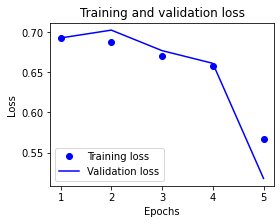

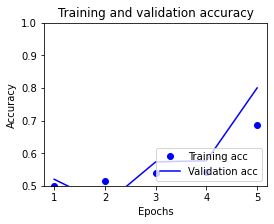

In [24]:
# 모델 훈련에 대한 시각화

BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5, 1))
plt.show()

In [25]:
# 드롭아웃이 적용된 모델

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional (Bidirectiona  (None, None, 128)        66048     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               41216     
 nal)                                                            
                                                                 
 dense_14 (Dense)            (None, 64)                4160      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_15 (Dense)            (None, 1)                

In [27]:
# 모델 훈련

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches,
                    validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 290s 112ms/step - loss: 0.5854 - accuracy: 0.6772 - val_loss: 0.4359 - val_accuracy: 0.8200
Epoch 2/5
2500/2500 [==============================] - 275s 110ms/step - loss: 0.3502 - accuracy: 0.8641 - val_loss: 0.4279 - val_accuracy: 0.8400
Epoch 3/5
2500/2500 [==============================] - 274s 110ms/step - loss: 0.2615 - accuracy: 0.9078 - val_loss: 0.3741 - val_accuracy: 0.8400
Epoch 4/5
2500/2500 [==============================] - 276s 110ms/step - loss: 0.2243 - accuracy: 0.9238 - val_loss: 0.4777 - val_accuracy: 0.8167
Epoch 5/5
2500/2500 [==============================] - 277s 111ms/step - loss: 0.1806 - accuracy: 0.9415 - val_loss: 0.3951 - val_accuracy: 0.8733


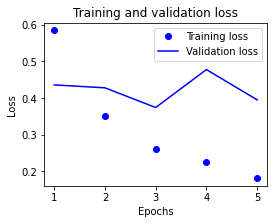

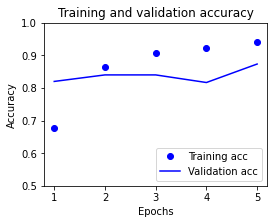

In [28]:
# 모델 훈련에 대한 시각화

BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5, 1))
plt.show()

In [29]:
# 양방향 RNN만 적용된 모델

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(encoder.vocab_size, 64),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, None, 64)          523840    
                                                                 
 bidirectional_2 (Bidirectio  (None, 128)              66048     
 nal)                                                            
                                                                 
 dense_16 (Dense)            (None, 64)                8256      
                                                                 
 dense_17 (Dense)            (None, 1)                 65        
                                                                 
Total params: 598,209
Trainable params: 598,209
Non-trainable params: 0
_________________________________________________________________


In [30]:
# 모델 훈련

model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
history = model.fit(train_batches, epochs=5, validation_data=test_batches,
                    validation_steps=30)

Epoch 1/5
2500/2500 [==============================] - 168s 66ms/step - loss: 0.5808 - accuracy: 0.6610 - val_loss: 0.3754 - val_accuracy: 0.8400
Epoch 2/5
2500/2500 [==============================] - 166s 66ms/step - loss: 0.2964 - accuracy: 0.8835 - val_loss: 0.3107 - val_accuracy: 0.8767
Epoch 3/5
2500/2500 [==============================] - 166s 66ms/step - loss: 0.2349 - accuracy: 0.9128 - val_loss: 0.3842 - val_accuracy: 0.8633
Epoch 4/5
2500/2500 [==============================] - 166s 66ms/step - loss: 0.1994 - accuracy: 0.9292 - val_loss: 0.3342 - val_accuracy: 0.8767
Epoch 5/5
2500/2500 [==============================] - 164s 66ms/step - loss: 0.1757 - accuracy: 0.9390 - val_loss: 0.3760 - val_accuracy: 0.8667


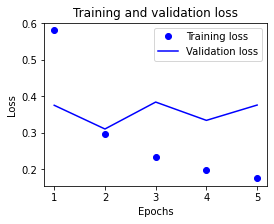

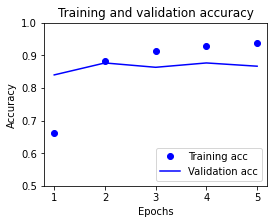

In [31]:
# 모델 훈련에 대한 시각화

BUFFER_SIZE = 10000
BATCH_SIZE = 64
train_dataset = train_batches.shuffle(BUFFER_SIZE)
import matplotlib.pyplot as plt
history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(acc)+1)
plt.figure(figsize=(4,3))
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.ylim((0.5, 1))
plt.show()

## 8.3.3 Early Stopping을 이용한 성능 최적화

In [32]:
# 라이브러리 호출

from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.datasets import imdb
import tensorflow as tf
import numpy as np

In [33]:
# 하이퍼파라미터 초기화

max_features = 5000
maxlen = 400
batch_size = 32
embedding_dims = 50
filters = 250
kernel_size = 3
hidden_dims = 250
epochs = 300
np.random.seed(7)

In [34]:
# 체크포인트 설정

import os
checkpoint_path = 'training_1/cp.ckpt'
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, verbose=1)

In [35]:
# 데이터셋 메모리로 로딩
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17473536/17464789 [==============================] - 0s 0us/step


In [36]:
# 모델 생성

model = Sequential()
model.add(Embedding(max_features,
                    embedding_dims,
                    input_length=maxlen))
model.add(Dropout(0.2))
model.add(Conv1D(filters,
                 kernel_size,
                 padding='valid',
                 activation='relu',
                 strides=1))
model.add(GlobalMaxPooling1D())
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 400, 50)           250000    
                                                                 
 dropout_1 (Dropout)         (None, 400, 50)           0         
                                                                 
 conv1d (Conv1D)             (None, 398, 250)          37750     
                                                                 
 global_max_pooling1d (Globa  (None, 250)              0         
 lMaxPooling1D)                                                  
                                                                 
 dense_18 (Dense)            (None, 250)               62750     
                                                                 
 dropout_2 (Dropout)         (None, 250)               0         
                                                      

In [37]:
# 조기 종료가 추가되지 않은 모델 훈련

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=[cp_callback])

Epoch 1/300
618/625 [============================>.] - ETA: 0s - loss: 0.4401 - accuracy: 0.7755
Epoch 1: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 14s 10ms/step - loss: 0.4379 - accuracy: 0.7770 - val_loss: 0.2846 - val_accuracy: 0.8834
Epoch 2/300
618/625 [============================>.] - ETA: 0s - loss: 0.2472 - accuracy: 0.8983
Epoch 2: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.2471 - accuracy: 0.8984 - val_loss: 0.2643 - val_accuracy: 0.8906
Epoch 3/300
624/625 [============================>.] - ETA: 0s - loss: 0.1642 - accuracy: 0.9382
Epoch 3: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.1643 - accuracy: 0.9381 - val_loss: 0.2668 - val_accuracy: 0.8992
Epoch 4/300
620/625 [============================>.] - ETA: 0s - loss: 0.1121 - accuracy: 0.9608
Epoch 4: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.1122 - accuracy: 0.9607 - val_loss: 0.3170 - val_accuracy: 0.8912
Epoch 5/300
625/625 [==============================] - ETA: 0s - loss: 0.0653 - accuracy: 0.9780
Epoch 5: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0653 - accuracy: 0.9780 - val_loss: 0.3782 - val_accuracy: 0.8844
Epoch 6/300
618/625 [============================>.] - ETA: 0s - loss: 0.0529 - accuracy: 0.9812
Epoch 6: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0527 - accuracy: 0.9811 - val_loss: 0.3988 - val_accuracy: 0.8884
Epoch 7/300
620/625 [============================>.] - ETA: 0s - loss: 0.0416 - accuracy: 0.9849
Epoch 7: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0420 - accuracy: 0.9847 - val_loss: 0.4535 - val_accuracy: 0.8832
Epoch 8/300
620/625 [============================>.] - ETA: 0s - loss: 0.0348 - accuracy: 0.9870
Epoch 8: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0349 - accuracy: 0.9869 - val_loss: 0.4959 - val_accuracy: 0.8820
Epoch 9/300
624/625 [============================>.] - ETA: 0s - loss: 0.0302 - accuracy: 0.9886
Epoch 9: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0301 - accuracy: 0.9887 - val_loss: 0.5242 - val_accuracy: 0.8904
Epoch 10/300
619/625 [============================>.] - ETA: 0s - loss: 0.0252 - accuracy: 0.9910
Epoch 10: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0253 - accuracy: 0.9908 - val_loss: 0.6369 - val_accuracy: 0.8668
Epoch 11/300
619/625 [============================>.] - ETA: 0s - loss: 0.0256 - accuracy: 0.9917
Epoch 11: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0255 - accuracy: 0.9918 - val_loss: 0.5360 - val_accuracy: 0.8864
Epoch 12/300
619/625 [============================>.] - ETA: 0s - loss: 0.0220 - accuracy: 0.9920
Epoch 12: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0219 - accuracy: 0.9920 - val_loss: 0.6041 - val_accuracy: 0.8876
Epoch 13/300
619/625 [============================>.] - ETA: 0s - loss: 0.0192 - accuracy: 0.9933
Epoch 13: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0193 - accuracy: 0.9933 - val_loss: 0.6242 - val_accuracy: 0.8814
Epoch 14/300
618/625 [============================>.] - ETA: 0s - loss: 0.0216 - accuracy: 0.9919
Epoch 14: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0221 - accuracy: 0.9918 - val_loss: 0.5782 - val_accuracy: 0.8824
Epoch 15/300
618/625 [============================>.] - ETA: 0s - loss: 0.0171 - accuracy: 0.9936
Epoch 15: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0173 - accuracy: 0.9935 - val_loss: 0.6667 - val_accuracy: 0.8792
Epoch 16/300
617/625 [============================>.] - ETA: 0s - loss: 0.0207 - accuracy: 0.9933
Epoch 16: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0205 - accuracy: 0.9934 - val_loss: 0.6045 - val_accuracy: 0.8882
Epoch 17/300
625/625 [==============================] - ETA: 0s - loss: 0.0202 - accuracy: 0.9925
Epoch 17: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0202 - accuracy: 0.9925 - val_loss: 0.7776 - val_accuracy: 0.8698
Epoch 18/300
621/625 [============================>.] - ETA: 0s - loss: 0.0196 - accuracy: 0.9927
Epoch 18: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0195 - accuracy: 0.9927 - val_loss: 0.6212 - val_accuracy: 0.8854
Epoch 19/300
620/625 [============================>.] - ETA: 0s - loss: 0.0197 - accuracy: 0.9927
Epoch 19: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0196 - accuracy: 0.9927 - val_loss: 0.6330 - val_accuracy: 0.8880
Epoch 20/300
619/625 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9951
Epoch 20: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.6694 - val_accuracy: 0.8896
Epoch 21/300
624/625 [============================>.] - ETA: 0s - loss: 0.0126 - accuracy: 0.9953
Epoch 21: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0127 - accuracy: 0.9953 - val_loss: 0.7139 - val_accuracy: 0.8850
Epoch 22/300
617/625 [============================>.] - ETA: 0s - loss: 0.0149 - accuracy: 0.9948
Epoch 22: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.6037 - val_accuracy: 0.8930
Epoch 23/300
622/625 [============================>.] - ETA: 0s - loss: 0.0099 - accuracy: 0.9963
Epoch 23: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0098 - accuracy: 0.9963 - val_loss: 0.6883 - val_accuracy: 0.8862
Epoch 24/300
623/625 [============================>.] - ETA: 0s - loss: 0.0143 - accuracy: 0.9951
Epoch 24: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0143 - accuracy: 0.9952 - val_loss: 0.6986 - val_accuracy: 0.8862
Epoch 25/300
624/625 [============================>.] - ETA: 0s - loss: 0.0159 - accuracy: 0.9941
Epoch 25: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0159 - accuracy: 0.9941 - val_loss: 0.7555 - val_accuracy: 0.8688
Epoch 26/300
625/625 [==============================] - ETA: 0s - loss: 0.0134 - accuracy: 0.9954
Epoch 26: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0134 - accuracy: 0.9954 - val_loss: 0.6992 - val_accuracy: 0.8872
Epoch 27/300
618/625 [============================>.] - ETA: 0s - loss: 0.0078 - accuracy: 0.9970
Epoch 27: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0078 - accuracy: 0.9970 - val_loss: 0.7854 - val_accuracy: 0.8838
Epoch 28/300
618/625 [============================>.] - ETA: 0s - loss: 0.0104 - accuracy: 0.9967
Epoch 28: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0104 - accuracy: 0.9967 - val_loss: 0.7593 - val_accuracy: 0.8818
Epoch 29/300
618/625 [============================>.] - ETA: 0s - loss: 0.0096 - accuracy: 0.9967
Epoch 29: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0096 - accuracy: 0.9967 - val_loss: 0.7923 - val_accuracy: 0.8928
Epoch 30/300
617/625 [============================>.] - ETA: 0s - loss: 0.0153 - accuracy: 0.9948
Epoch 30: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0155 - accuracy: 0.9947 - val_loss: 0.7756 - val_accuracy: 0.8776
Epoch 31/300
624/625 [============================>.] - ETA: 0s - loss: 0.0118 - accuracy: 0.9953
Epoch 31: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0118 - accuracy: 0.9954 - val_loss: 0.7690 - val_accuracy: 0.8904
Epoch 32/300
622/625 [============================>.] - ETA: 0s - loss: 0.0097 - accuracy: 0.9966
Epoch 32: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0097 - accuracy: 0.9966 - val_loss: 0.7934 - val_accuracy: 0.8906
Epoch 33/300
620/625 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9971
Epoch 33: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0080 - accuracy: 0.9970 - val_loss: 0.7973 - val_accuracy: 0.8914
Epoch 34/300
619/625 [============================>.] - ETA: 0s - loss: 0.0085 - accuracy: 0.9972
Epoch 34: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0085 - accuracy: 0.9972 - val_loss: 0.7040 - val_accuracy: 0.8918
Epoch 35/300
619/625 [============================>.] - ETA: 0s - loss: 0.0113 - accuracy: 0.9963
Epoch 35: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0112 - accuracy: 0.9963 - val_loss: 0.6887 - val_accuracy: 0.8916
Epoch 36/300
620/625 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9973
Epoch 36: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0073 - accuracy: 0.9973 - val_loss: 0.7440 - val_accuracy: 0.8922
Epoch 37/300
625/625 [==============================] - ETA: 0s - loss: 0.0067 - accuracy: 0.9977
Epoch 37: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0067 - accuracy: 0.9977 - val_loss: 0.7710 - val_accuracy: 0.8946
Epoch 38/300
621/625 [============================>.] - ETA: 0s - loss: 0.0122 - accuracy: 0.9957
Epoch 38: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0125 - accuracy: 0.9956 - val_loss: 0.7322 - val_accuracy: 0.8868
Epoch 39/300
621/625 [============================>.] - ETA: 0s - loss: 0.0091 - accuracy: 0.9969
Epoch 39: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0091 - accuracy: 0.9969 - val_loss: 0.8548 - val_accuracy: 0.8890
Epoch 40/300
618/625 [============================>.] - ETA: 0s - loss: 0.0095 - accuracy: 0.9967
Epoch 40: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0094 - accuracy: 0.9967 - val_loss: 0.7975 - val_accuracy: 0.8910
Epoch 41/300
619/625 [============================>.] - ETA: 0s - loss: 0.0083 - accuracy: 0.9972
Epoch 41: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0083 - accuracy: 0.9972 - val_loss: 0.7971 - val_accuracy: 0.8906
Epoch 42/300
621/625 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9976
Epoch 42: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0069 - accuracy: 0.9976 - val_loss: 0.8875 - val_accuracy: 0.8800
Epoch 43/300
623/625 [============================>.] - ETA: 0s - loss: 0.0080 - accuracy: 0.9972
Epoch 43: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0080 - accuracy: 0.9973 - val_loss: 0.7997 - val_accuracy: 0.8914
Epoch 44/300
623/625 [============================>.] - ETA: 0s - loss: 0.0079 - accuracy: 0.9969
Epoch 44: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0079 - accuracy: 0.9969 - val_loss: 0.7688 - val_accuracy: 0.8926
Epoch 45/300
621/625 [============================>.] - ETA: 0s - loss: 0.0093 - accuracy: 0.9971
Epoch 45: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0093 - accuracy: 0.9971 - val_loss: 0.8055 - val_accuracy: 0.8936
Epoch 46/300
618/625 [============================>.] - ETA: 0s - loss: 0.0094 - accuracy: 0.9971
Epoch 46: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0094 - accuracy: 0.9971 - val_loss: 0.7710 - val_accuracy: 0.8882
Epoch 47/300
618/625 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9978
Epoch 47: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 0.8185 - val_accuracy: 0.8820
Epoch 48/300
621/625 [============================>.] - ETA: 0s - loss: 0.0076 - accuracy: 0.9975
Epoch 48: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0075 - accuracy: 0.9976 - val_loss: 0.8285 - val_accuracy: 0.8878
Epoch 49/300
622/625 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9978
Epoch 49: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0064 - accuracy: 0.9979 - val_loss: 0.7229 - val_accuracy: 0.8880
Epoch 50/300
617/625 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9979
Epoch 50: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0063 - accuracy: 0.9979 - val_loss: 0.8000 - val_accuracy: 0.8884
Epoch 51/300
618/625 [============================>.] - ETA: 0s - loss: 0.0071 - accuracy: 0.9976
Epoch 51: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0070 - accuracy: 0.9976 - val_loss: 0.9048 - val_accuracy: 0.8902
Epoch 52/300
625/625 [==============================] - ETA: 0s - loss: 0.0086 - accuracy: 0.9973
Epoch 52: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0086 - accuracy: 0.9973 - val_loss: 0.7394 - val_accuracy: 0.8872
Epoch 53/300
624/625 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9979
Epoch 53: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.8356 - val_accuracy: 0.8878
Epoch 54/300
622/625 [============================>.] - ETA: 0s - loss: 0.0075 - accuracy: 0.9974
Epoch 54: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0074 - accuracy: 0.9974 - val_loss: 0.8433 - val_accuracy: 0.8804
Epoch 55/300
620/625 [============================>.] - ETA: 0s - loss: 0.0072 - accuracy: 0.9976
Epoch 55: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0071 - accuracy: 0.9977 - val_loss: 0.7262 - val_accuracy: 0.8892
Epoch 56/300
620/625 [============================>.] - ETA: 0s - loss: 0.0063 - accuracy: 0.9975
Epoch 56: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0063 - accuracy: 0.9976 - val_loss: 0.9233 - val_accuracy: 0.8844
Epoch 57/300
622/625 [============================>.] - ETA: 0s - loss: 0.0073 - accuracy: 0.9974
Epoch 57: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.8743 - val_accuracy: 0.8822
Epoch 58/300
618/625 [============================>.] - ETA: 0s - loss: 0.0039 - accuracy: 0.9985
Epoch 58: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0039 - accuracy: 0.9985 - val_loss: 0.8675 - val_accuracy: 0.8864
Epoch 59/300
621/625 [============================>.] - ETA: 0s - loss: 0.0061 - accuracy: 0.9977
Epoch 59: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0061 - accuracy: 0.9977 - val_loss: 0.7700 - val_accuracy: 0.8872
Epoch 60/300
620/625 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9983
Epoch 60: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0049 - accuracy: 0.9983 - val_loss: 0.8109 - val_accuracy: 0.8864
Epoch 61/300
617/625 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9984
Epoch 61: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0048 - accuracy: 0.9984 - val_loss: 0.7929 - val_accuracy: 0.8876
Epoch 62/300
618/625 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9985
Epoch 62: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.9932 - val_accuracy: 0.8756
Epoch 63/300
621/625 [============================>.] - ETA: 0s - loss: 0.0060 - accuracy: 0.9979
Epoch 63: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.9256 - val_accuracy: 0.8886
Epoch 64/300
621/625 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9979
Epoch 64: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0067 - accuracy: 0.9980 - val_loss: 0.8127 - val_accuracy: 0.8880
Epoch 65/300
620/625 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9984
Epoch 65: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.8652 - val_accuracy: 0.8844
Epoch 66/300
617/625 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9981
Epoch 66: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0051 - accuracy: 0.9980 - val_loss: 0.9801 - val_accuracy: 0.8838
Epoch 67/300
618/625 [============================>.] - ETA: 0s - loss: 0.0067 - accuracy: 0.9978
Epoch 67: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0066 - accuracy: 0.9978 - val_loss: 0.7623 - val_accuracy: 0.8884
Epoch 68/300
617/625 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9981
Epoch 68: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.7492 - val_accuracy: 0.8900
Epoch 69/300
619/625 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9982
Epoch 69: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0043 - accuracy: 0.9983 - val_loss: 0.8558 - val_accuracy: 0.8872
Epoch 70/300
620/625 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9985
Epoch 70: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0041 - accuracy: 0.9985 - val_loss: 0.8653 - val_accuracy: 0.8896
Epoch 71/300
619/625 [============================>.] - ETA: 0s - loss: 0.0065 - accuracy: 0.9980
Epoch 71: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0065 - accuracy: 0.9980 - val_loss: 0.8896 - val_accuracy: 0.8850
Epoch 72/300
625/625 [==============================] - ETA: 0s - loss: 0.0057 - accuracy: 0.9978
Epoch 72: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0057 - accuracy: 0.9978 - val_loss: 0.8428 - val_accuracy: 0.8868
Epoch 73/300
620/625 [============================>.] - ETA: 0s - loss: 0.0059 - accuracy: 0.9979
Epoch 73: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0059 - accuracy: 0.9979 - val_loss: 0.8184 - val_accuracy: 0.8902
Epoch 74/300
620/625 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9985
Epoch 74: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0043 - accuracy: 0.9985 - val_loss: 0.9833 - val_accuracy: 0.8820
Epoch 75/300
621/625 [============================>.] - ETA: 0s - loss: 0.0055 - accuracy: 0.9981
Epoch 75: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0054 - accuracy: 0.9981 - val_loss: 0.8696 - val_accuracy: 0.8898
Epoch 76/300
620/625 [============================>.] - ETA: 0s - loss: 0.0064 - accuracy: 0.9979
Epoch 76: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0064 - accuracy: 0.9980 - val_loss: 0.8167 - val_accuracy: 0.8806
Epoch 77/300
624/625 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9981
Epoch 77: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0048 - accuracy: 0.9981 - val_loss: 0.9868 - val_accuracy: 0.8828
Epoch 78/300
625/625 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9986
Epoch 78: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 1.0561 - val_accuracy: 0.8876
Epoch 79/300
624/625 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9986
Epoch 79: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 1.0631 - val_accuracy: 0.8822
Epoch 80/300
622/625 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9983
Epoch 80: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0055 - accuracy: 0.9983 - val_loss: 0.9778 - val_accuracy: 0.8850
Epoch 81/300
624/625 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9983
Epoch 81: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0052 - accuracy: 0.9984 - val_loss: 0.8761 - val_accuracy: 0.8906
Epoch 82/300
624/625 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9984
Epoch 82: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 0.9533 - val_accuracy: 0.8886
Epoch 83/300
624/625 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9988
Epoch 83: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9988 - val_loss: 0.9020 - val_accuracy: 0.8880
Epoch 84/300
624/625 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9987
Epoch 84: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0043 - accuracy: 0.9987 - val_loss: 0.9211 - val_accuracy: 0.8892
Epoch 85/300
625/625 [==============================] - ETA: 0s - loss: 0.0027 - accuracy: 0.9990
Epoch 85: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0027 - accuracy: 0.9990 - val_loss: 0.9204 - val_accuracy: 0.8894
Epoch 86/300
622/625 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9987
Epoch 86: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0041 - accuracy: 0.9987 - val_loss: 1.0157 - val_accuracy: 0.8892
Epoch 87/300
624/625 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 0.9983
Epoch 87: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0046 - accuracy: 0.9983 - val_loss: 1.0321 - val_accuracy: 0.8896
Epoch 88/300
618/625 [============================>.] - ETA: 0s - loss: 0.0052 - accuracy: 0.9981
Epoch 88: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0052 - accuracy: 0.9981 - val_loss: 0.9083 - val_accuracy: 0.8872
Epoch 89/300
621/625 [============================>.] - ETA: 0s - loss: 0.0054 - accuracy: 0.9979
Epoch 89: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0053 - accuracy: 0.9979 - val_loss: 1.1034 - val_accuracy: 0.8708
Epoch 90/300
621/625 [============================>.] - ETA: 0s - loss: 0.0068 - accuracy: 0.9980
Epoch 90: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0069 - accuracy: 0.9980 - val_loss: 0.9160 - val_accuracy: 0.8838
Epoch 91/300
620/625 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9992
Epoch 91: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 0.9212 - val_accuracy: 0.8842
Epoch 92/300
624/625 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9989
Epoch 92: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 1.0666 - val_accuracy: 0.8760
Epoch 93/300
620/625 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9988
Epoch 93: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0029 - accuracy: 0.9988 - val_loss: 0.9535 - val_accuracy: 0.8930
Epoch 94/300
625/625 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9987
Epoch 94: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0039 - accuracy: 0.9987 - val_loss: 0.9051 - val_accuracy: 0.8914
Epoch 95/300
624/625 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9987
Epoch 95: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 0.9386 - val_accuracy: 0.8886
Epoch 96/300
624/625 [============================>.] - ETA: 0s - loss: 0.0040 - accuracy: 0.9987
Epoch 96: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.9261 - val_accuracy: 0.8904
Epoch 97/300
618/625 [============================>.] - ETA: 0s - loss: 0.0048 - accuracy: 0.9983
Epoch 97: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0048 - accuracy: 0.9983 - val_loss: 0.7971 - val_accuracy: 0.8810
Epoch 98/300
620/625 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9993
Epoch 98: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 1.1020 - val_accuracy: 0.8744
Epoch 99/300
621/625 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9985
Epoch 99: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.7994 - val_accuracy: 0.8860
Epoch 100/300
620/625 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9987
Epoch 100: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0042 - accuracy: 0.9987 - val_loss: 0.8535 - val_accuracy: 0.8868
Epoch 101/300
619/625 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9990
Epoch 101: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 0.9591 - val_accuracy: 0.8872
Epoch 102/300
622/625 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9993
Epoch 102: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0022 - accuracy: 0.9994 - val_loss: 0.9955 - val_accuracy: 0.8814
Epoch 103/300
624/625 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9992
Epoch 103: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 0.9757 - val_accuracy: 0.8862
Epoch 104/300
619/625 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9988
Epoch 104: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0031 - accuracy: 0.9987 - val_loss: 1.0514 - val_accuracy: 0.8840
Epoch 105/300
621/625 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9990
Epoch 105: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 1.2325 - val_accuracy: 0.8848
Epoch 106/300
625/625 [==============================] - ETA: 0s - loss: 0.0039 - accuracy: 0.9986
Epoch 106: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0039 - accuracy: 0.9986 - val_loss: 1.1418 - val_accuracy: 0.8862
Epoch 107/300
622/625 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9989
Epoch 107: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0040 - accuracy: 0.9989 - val_loss: 0.9751 - val_accuracy: 0.8854
Epoch 108/300
617/625 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9986
Epoch 108: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0044 - accuracy: 0.9987 - val_loss: 1.0423 - val_accuracy: 0.8864
Epoch 109/300
618/625 [============================>.] - ETA: 0s - loss: 0.0041 - accuracy: 0.9986
Epoch 109: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0042 - accuracy: 0.9986 - val_loss: 1.1892 - val_accuracy: 0.8840
Epoch 110/300
622/625 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9988
Epoch 110: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0033 - accuracy: 0.9988 - val_loss: 1.2989 - val_accuracy: 0.8690
Epoch 111/300
622/625 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9992
Epoch 111: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0030 - accuracy: 0.9992 - val_loss: 1.0228 - val_accuracy: 0.8892
Epoch 112/300
621/625 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9986
Epoch 112: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0034 - accuracy: 0.9987 - val_loss: 0.9026 - val_accuracy: 0.8908
Epoch 113/300
621/625 [============================>.] - ETA: 0s - loss: 0.0050 - accuracy: 0.9984
Epoch 113: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0050 - accuracy: 0.9984 - val_loss: 0.8123 - val_accuracy: 0.8872
Epoch 114/300
621/625 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9989
Epoch 114: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0031 - accuracy: 0.9989 - val_loss: 0.9533 - val_accuracy: 0.8790
Epoch 115/300
624/625 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9992
Epoch 115: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 1.0604 - val_accuracy: 0.8862
Epoch 116/300
624/625 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9991
Epoch 116: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 1.0823 - val_accuracy: 0.8872
Epoch 117/300
622/625 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9988
Epoch 117: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0037 - accuracy: 0.9988 - val_loss: 0.8693 - val_accuracy: 0.8884
Epoch 118/300
621/625 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992
Epoch 118: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 0.9808 - val_accuracy: 0.8874
Epoch 119/300
625/625 [==============================] - ETA: 0s - loss: 0.0033 - accuracy: 0.9989
Epoch 119: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0033 - accuracy: 0.9989 - val_loss: 0.9611 - val_accuracy: 0.8878
Epoch 120/300
618/625 [============================>.] - ETA: 0s - loss: 0.0042 - accuracy: 0.9984
Epoch 120: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0042 - accuracy: 0.9984 - val_loss: 0.9537 - val_accuracy: 0.8866
Epoch 121/300
621/625 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9992
Epoch 121: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9992 - val_loss: 0.9571 - val_accuracy: 0.8870
Epoch 122/300
621/625 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9986
Epoch 122: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9986 - val_loss: 0.9268 - val_accuracy: 0.8876
Epoch 123/300
625/625 [==============================] - ETA: 0s - loss: 0.0026 - accuracy: 0.9990
Epoch 123: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0026 - accuracy: 0.9990 - val_loss: 1.0488 - val_accuracy: 0.8868
Epoch 124/300
617/625 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9990
Epoch 124: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 1.0611 - val_accuracy: 0.8872
Epoch 125/300
624/625 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9992
Epoch 125: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0034 - accuracy: 0.9992 - val_loss: 1.0808 - val_accuracy: 0.8864
Epoch 126/300
623/625 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9988
Epoch 126: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0030 - accuracy: 0.9988 - val_loss: 1.0378 - val_accuracy: 0.8888
Epoch 127/300
622/625 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9993
Epoch 127: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 1.1322 - val_accuracy: 0.8894
Epoch 128/300
618/625 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9987
Epoch 128: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 1.1749 - val_accuracy: 0.8878
Epoch 129/300
617/625 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9989
Epoch 129: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0035 - accuracy: 0.9989 - val_loss: 1.1611 - val_accuracy: 0.8850
Epoch 130/300
619/625 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9994
Epoch 130: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 1.1540 - val_accuracy: 0.8844
Epoch 131/300
624/625 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9987
Epoch 131: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0036 - accuracy: 0.9987 - val_loss: 1.4121 - val_accuracy: 0.8728
Epoch 132/300
622/625 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9994
Epoch 132: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0024 - accuracy: 0.9995 - val_loss: 1.1866 - val_accuracy: 0.8904
Epoch 133/300
625/625 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9994
Epoch 133: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 1.1753 - val_accuracy: 0.8882
Epoch 134/300
623/625 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9988
Epoch 134: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0034 - accuracy: 0.9988 - val_loss: 1.0478 - val_accuracy: 0.8922
Epoch 135/300
625/625 [==============================] - ETA: 0s - loss: 0.0038 - accuracy: 0.9987
Epoch 135: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0038 - accuracy: 0.9987 - val_loss: 0.8980 - val_accuracy: 0.8900
Epoch 136/300
621/625 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9990
Epoch 136: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0021 - accuracy: 0.9990 - val_loss: 1.1933 - val_accuracy: 0.8892
Epoch 137/300
624/625 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9989
Epoch 137: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0026 - accuracy: 0.9990 - val_loss: 1.1022 - val_accuracy: 0.8874
Epoch 138/300
620/625 [============================>.] - ETA: 0s - loss: 0.0037 - accuracy: 0.9989
Epoch 138: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 1.0460 - val_accuracy: 0.8886
Epoch 139/300
617/625 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9991
Epoch 139: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0031 - accuracy: 0.9991 - val_loss: 1.0485 - val_accuracy: 0.8888
Epoch 140/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995
Epoch 140: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 1.1480 - val_accuracy: 0.8884
Epoch 141/300
618/625 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9990
Epoch 141: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 1.2195 - val_accuracy: 0.8838
Epoch 142/300
620/625 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9991
Epoch 142: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 1.1284 - val_accuracy: 0.8898
Epoch 143/300
619/625 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9994
Epoch 143: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 1.2880 - val_accuracy: 0.8888
Epoch 144/300
620/625 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 144: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.0970 - val_accuracy: 0.8920
Epoch 145/300
619/625 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995
Epoch 145: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.2897 - val_accuracy: 0.8860
Epoch 146/300
620/625 [============================>.] - ETA: 0s - loss: 0.0043 - accuracy: 0.9985
Epoch 146: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 1.2340 - val_accuracy: 0.8846
Epoch 147/300
620/625 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992
Epoch 147: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0024 - accuracy: 0.9992 - val_loss: 1.1952 - val_accuracy: 0.8846
Epoch 148/300
618/625 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9990
Epoch 148: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0024 - accuracy: 0.9991 - val_loss: 1.2512 - val_accuracy: 0.8856
Epoch 149/300
620/625 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995
Epoch 149: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 1.0719 - val_accuracy: 0.8816
Epoch 150/300
618/625 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9990
Epoch 150: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9991 - val_loss: 0.9004 - val_accuracy: 0.8890
Epoch 151/300
619/625 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9994
Epoch 151: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 1.1680 - val_accuracy: 0.8808
Epoch 152/300
623/625 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9993
Epoch 152: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 1.4203 - val_accuracy: 0.8786
Epoch 153/300
620/625 [============================>.] - ETA: 0s - loss: 0.0056 - accuracy: 0.9986
Epoch 153: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.9452 - val_accuracy: 0.8810
Epoch 154/300
623/625 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9993
Epoch 154: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9994 - val_loss: 1.1281 - val_accuracy: 0.8866
Epoch 155/300
623/625 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9994
Epoch 155: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.3593 - val_accuracy: 0.8786
Epoch 156/300
618/625 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9992
Epoch 156: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 1.3507 - val_accuracy: 0.8774
Epoch 157/300
618/625 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9989
Epoch 157: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0038 - accuracy: 0.9989 - val_loss: 1.0283 - val_accuracy: 0.8852
Epoch 158/300
623/625 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9991
Epoch 158: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 1.0113 - val_accuracy: 0.8846
Epoch 159/300
620/625 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 159: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.0873 - val_accuracy: 0.8844
Epoch 160/300
620/625 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991
Epoch 160: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0026 - accuracy: 0.9991 - val_loss: 1.3561 - val_accuracy: 0.8742
Epoch 161/300
624/625 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9992
Epoch 161: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 1.1496 - val_accuracy: 0.8888
Epoch 162/300
623/625 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9993
Epoch 162: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 1.1277 - val_accuracy: 0.8868
Epoch 163/300
625/625 [==============================] - ETA: 0s - loss: 9.3239e-04 - accuracy: 0.9995
Epoch 163: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 9.3239e-04 - accuracy: 0.9995 - val_loss: 1.1908 - val_accuracy: 0.8870
Epoch 164/300
622/625 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9995
Epoch 164: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.2169 - val_accuracy: 0.8850
Epoch 165/300
620/625 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9995
Epoch 165: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 1.1478 - val_accuracy: 0.8848
Epoch 166/300
621/625 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9992
Epoch 166: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0022 - accuracy: 0.9992 - val_loss: 1.3661 - val_accuracy: 0.8840
Epoch 167/300
625/625 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9984
Epoch 167: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0043 - accuracy: 0.9984 - val_loss: 1.1135 - val_accuracy: 0.8822
Epoch 168/300
620/625 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995
Epoch 168: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 1.1719 - val_accuracy: 0.8828
Epoch 169/300
619/625 [============================>.] - ETA: 0s - loss: 5.6509e-04 - accuracy: 0.9997
Epoch 169: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 5.5975e-04 - accuracy: 0.9998 - val_loss: 1.3146 - val_accuracy: 0.8844
Epoch 170/300
622/625 [============================>.] - ETA: 0s - loss: 6.9697e-04 - accuracy: 0.9998
Epoch 170: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 1.3161 - val_accuracy: 0.8822
Epoch 171/300
623/625 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9988
Epoch 171: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0038 - accuracy: 0.9988 - val_loss: 1.0289 - val_accuracy: 0.8860
Epoch 172/300
618/625 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9991
Epoch 172: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 1.5876 - val_accuracy: 0.8792
Epoch 173/300
619/625 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9990
Epoch 173: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 1.3371 - val_accuracy: 0.8898
Epoch 174/300
620/625 [============================>.] - ETA: 0s - loss: 5.8362e-04 - accuracy: 0.9998
Epoch 174: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 5.7895e-04 - accuracy: 0.9998 - val_loss: 1.5157 - val_accuracy: 0.8870
Epoch 175/300
620/625 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996
Epoch 175: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9997 - val_loss: 1.4154 - val_accuracy: 0.8866
Epoch 176/300
620/625 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9990
Epoch 176: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 1.2042 - val_accuracy: 0.8862
Epoch 177/300
623/625 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9995
Epoch 177: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 1.3448 - val_accuracy: 0.8882
Epoch 178/300
622/625 [============================>.] - ETA: 0s - loss: 0.0062 - accuracy: 0.9978
Epoch 178: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0062 - accuracy: 0.9978 - val_loss: 1.1923 - val_accuracy: 0.8858
Epoch 179/300
623/625 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9993
Epoch 179: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 1.4885 - val_accuracy: 0.8832
Epoch 180/300
619/625 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9992
Epoch 180: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 1.1417 - val_accuracy: 0.8838
Epoch 181/300
619/625 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9993
Epoch 181: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9993 - val_loss: 1.1852 - val_accuracy: 0.8828
Epoch 182/300
625/625 [==============================] - ETA: 0s - loss: 0.0032 - accuracy: 0.9988
Epoch 182: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0032 - accuracy: 0.9988 - val_loss: 1.2483 - val_accuracy: 0.8790
Epoch 183/300
622/625 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9990
Epoch 183: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0026 - accuracy: 0.9990 - val_loss: 1.3345 - val_accuracy: 0.8802
Epoch 184/300
624/625 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996
Epoch 184: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0012 - accuracy: 0.9997 - val_loss: 1.3344 - val_accuracy: 0.8858
Epoch 185/300
617/625 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995
Epoch 185: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.2644 - val_accuracy: 0.8838
Epoch 186/300
625/625 [==============================] - ETA: 0s - loss: 0.0015 - accuracy: 0.9996
Epoch 186: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 1.3958 - val_accuracy: 0.8842
Epoch 187/300
624/625 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9990
Epoch 187: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0032 - accuracy: 0.9991 - val_loss: 1.1805 - val_accuracy: 0.8850
Epoch 188/300
618/625 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9992
Epoch 188: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0027 - accuracy: 0.9992 - val_loss: 1.1120 - val_accuracy: 0.8870
Epoch 189/300
620/625 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995    
Epoch 189: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 1.2974 - val_accuracy: 0.8874
Epoch 190/300
617/625 [============================>.] - ETA: 0s - loss: 0.0024 - accuracy: 0.9992
Epoch 190: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0025 - accuracy: 0.9991 - val_loss: 1.0597 - val_accuracy: 0.8816
Epoch 191/300
620/625 [============================>.] - ETA: 0s - loss: 9.9146e-04 - accuracy: 0.9997
Epoch 191: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 9.8908e-04 - accuracy: 0.9997 - val_loss: 1.4654 - val_accuracy: 0.8858
Epoch 192/300
618/625 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9994
Epoch 192: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.1299 - val_accuracy: 0.8862
Epoch 193/300
620/625 [============================>.] - ETA: 0s - loss: 0.0032 - accuracy: 0.9990
Epoch 193: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0031 - accuracy: 0.9990 - val_loss: 1.5110 - val_accuracy: 0.8762
Epoch 194/300
620/625 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9994
Epoch 194: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.2234 - val_accuracy: 0.8874
Epoch 195/300
622/625 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9994
Epoch 195: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 1.3040 - val_accuracy: 0.8814
Epoch 196/300
620/625 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9995
Epoch 196: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0023 - accuracy: 0.9995 - val_loss: 1.2343 - val_accuracy: 0.8868
Epoch 197/300
617/625 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9992
Epoch 197: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 1.2826 - val_accuracy: 0.8862
Epoch 198/300
620/625 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9994
Epoch 198: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 1.1637 - val_accuracy: 0.8860
Epoch 199/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9992
Epoch 199: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 1.3470 - val_accuracy: 0.8824
Epoch 200/300
622/625 [============================>.] - ETA: 0s - loss: 9.7308e-04 - accuracy: 0.9997
Epoch 200: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0010 - accuracy: 0.9997 - val_loss: 1.4365 - val_accuracy: 0.8866
Epoch 201/300
625/625 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9992
Epoch 201: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 1.3058 - val_accuracy: 0.8856
Epoch 202/300
620/625 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9996
Epoch 202: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 1.3111 - val_accuracy: 0.8828
Epoch 203/300
623/625 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9993
Epoch 203: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.4244 - val_accuracy: 0.8788
Epoch 204/300
619/625 [============================>.] - ETA: 0s - loss: 8.5279e-04 - accuracy: 0.9997
Epoch 204: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 8.4461e-04 - accuracy: 0.9998 - val_loss: 1.5304 - val_accuracy: 0.8902
Epoch 205/300
623/625 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9991
Epoch 205: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0023 - accuracy: 0.9991 - val_loss: 1.6216 - val_accuracy: 0.8874
Epoch 206/300
617/625 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9994
Epoch 206: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 1.4526 - val_accuracy: 0.8808
Epoch 207/300
625/625 [==============================] - ETA: 0s - loss: 0.0045 - accuracy: 0.9987
Epoch 207: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0045 - accuracy: 0.9987 - val_loss: 1.3273 - val_accuracy: 0.8858
Epoch 208/300
623/625 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9995
Epoch 208: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 1.6201 - val_accuracy: 0.8868
Epoch 209/300
617/625 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9993
Epoch 209: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0033 - accuracy: 0.9993 - val_loss: 1.1998 - val_accuracy: 0.8892
Epoch 210/300
624/625 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9993
Epoch 210: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9993 - val_loss: 1.1658 - val_accuracy: 0.8870
Epoch 211/300
618/625 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9994
Epoch 211: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 1.1750 - val_accuracy: 0.8906
Epoch 212/300
620/625 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9994
Epoch 212: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9995 - val_loss: 1.3246 - val_accuracy: 0.8896
Epoch 213/300
621/625 [============================>.] - ETA: 0s - loss: 0.0022 - accuracy: 0.9994
Epoch 213: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 1.2944 - val_accuracy: 0.8882
Epoch 214/300
618/625 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 214: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.3369 - val_accuracy: 0.8914
Epoch 215/300
620/625 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9990
Epoch 215: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0029 - accuracy: 0.9991 - val_loss: 1.1882 - val_accuracy: 0.8880
Epoch 216/300
621/625 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9994
Epoch 216: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.4417 - val_accuracy: 0.8956
Epoch 217/300
622/625 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9991
Epoch 217: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 1.2608 - val_accuracy: 0.8908
Epoch 218/300
617/625 [============================>.] - ETA: 0s - loss: 9.5620e-04 - accuracy: 0.9996
Epoch 218: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 9.4430e-04 - accuracy: 0.9996 - val_loss: 1.3519 - val_accuracy: 0.8830
Epoch 219/300
625/625 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.9994
Epoch 219: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 1.3315 - val_accuracy: 0.8886
Epoch 220/300
624/625 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9991
Epoch 220: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0027 - accuracy: 0.9991 - val_loss: 1.2790 - val_accuracy: 0.8790
Epoch 221/300
621/625 [============================>.] - ETA: 0s - loss: 0.0025 - accuracy: 0.9992
Epoch 221: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 1.2524 - val_accuracy: 0.8912
Epoch 222/300
620/625 [============================>.] - ETA: 0s - loss: 0.0028 - accuracy: 0.9992
Epoch 222: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0028 - accuracy: 0.9991 - val_loss: 1.2798 - val_accuracy: 0.8860
Epoch 223/300
619/625 [============================>.] - ETA: 0s - loss: 7.0868e-04 - accuracy: 0.9997
Epoch 223: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 8.3401e-04 - accuracy: 0.9997 - val_loss: 1.6042 - val_accuracy: 0.8790
Epoch 224/300
625/625 [==============================] - ETA: 0s - loss: 0.0043 - accuracy: 0.9989
Epoch 224: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0043 - accuracy: 0.9989 - val_loss: 1.2917 - val_accuracy: 0.8818
Epoch 225/300
622/625 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995
Epoch 225: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 1.2055 - val_accuracy: 0.8872
Epoch 226/300
623/625 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9995
Epoch 226: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.9907 - val_accuracy: 0.8884
Epoch 227/300
619/625 [============================>.] - ETA: 0s - loss: 5.3945e-04 - accuracy: 0.9999
Epoch 227: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 5.3443e-04 - accuracy: 0.9999 - val_loss: 1.2873 - val_accuracy: 0.8890
Epoch 228/300
620/625 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9992
Epoch 228: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0028 - accuracy: 0.9992 - val_loss: 1.2163 - val_accuracy: 0.8872
Epoch 229/300
621/625 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9995
Epoch 229: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.2287 - val_accuracy: 0.8876
Epoch 230/300
625/625 [==============================] - ETA: 0s - loss: 0.0023 - accuracy: 0.9994
Epoch 230: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 0.9999 - val_accuracy: 0.8872
Epoch 231/300
618/625 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9996
Epoch 231: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 1.0359 - val_accuracy: 0.8862
Epoch 232/300
625/625 [==============================] - ETA: 0s - loss: 3.1922e-04 - accuracy: 0.9999
Epoch 232: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 3.1922e-04 - accuracy: 0.9999 - val_loss: 1.3715 - val_accuracy: 0.8842
Epoch 233/300
620/625 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9990
Epoch 233: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 1.0870 - val_accuracy: 0.8792
Epoch 234/300
618/625 [============================>.] - ETA: 0s - loss: 1.2242e-04 - accuracy: 1.0000
Epoch 234: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 1.2110e-04 - accuracy: 1.0000 - val_loss: 1.4479 - val_accuracy: 0.8850
Epoch 235/300
619/625 [============================>.] - ETA: 0s - loss: 0.0046 - accuracy: 0.9988
Epoch 235: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0045 - accuracy: 0.9988 - val_loss: 1.1679 - val_accuracy: 0.8866
Epoch 236/300
622/625 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9996
Epoch 236: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 1.2897 - val_accuracy: 0.8704
Epoch 237/300
620/625 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9994
Epoch 237: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.1974 - val_accuracy: 0.8856
Epoch 238/300
618/625 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9994
Epoch 238: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0015 - accuracy: 0.9994 - val_loss: 1.3068 - val_accuracy: 0.8842
Epoch 239/300
619/625 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996
Epoch 239: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 1.4221 - val_accuracy: 0.8836
Epoch 240/300
618/625 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9992
Epoch 240: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 1.4426 - val_accuracy: 0.8868
Epoch 241/300
619/625 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9994
Epoch 241: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 1.3840 - val_accuracy: 0.8852
Epoch 242/300
622/625 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9994
Epoch 242: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.6516 - val_accuracy: 0.8740
Epoch 243/300
618/625 [============================>.] - ETA: 0s - loss: 7.7458e-04 - accuracy: 0.9997
Epoch 243: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 7.7289e-04 - accuracy: 0.9997 - val_loss: 1.5562 - val_accuracy: 0.8848
Epoch 244/300
621/625 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9992
Epoch 244: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 1.8839 - val_accuracy: 0.8796
Epoch 245/300
621/625 [============================>.] - ETA: 0s - loss: 0.0027 - accuracy: 0.9994
Epoch 245: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0027 - accuracy: 0.9994 - val_loss: 1.4690 - val_accuracy: 0.8864
Epoch 246/300
619/625 [============================>.] - ETA: 0s - loss: 0.0013 - accuracy: 0.9997
Epoch 246: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 1.4395 - val_accuracy: 0.8884
Epoch 247/300
620/625 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9995
Epoch 247: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.1745 - val_accuracy: 0.8868
Epoch 248/300
619/625 [============================>.] - ETA: 0s - loss: 9.6379e-04 - accuracy: 0.9996
Epoch 248: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 9.5474e-04 - accuracy: 0.9997 - val_loss: 1.3166 - val_accuracy: 0.8884
Epoch 249/300
624/625 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9992
Epoch 249: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0020 - accuracy: 0.9992 - val_loss: 1.1960 - val_accuracy: 0.8892
Epoch 250/300
621/625 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9996
Epoch 250: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 1.4006 - val_accuracy: 0.8896
Epoch 251/300
625/625 [==============================] - ETA: 0s - loss: 3.9984e-04 - accuracy: 0.9999
Epoch 251: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 3.9984e-04 - accuracy: 0.9999 - val_loss: 1.6691 - val_accuracy: 0.8866
Epoch 252/300
621/625 [============================>.] - ETA: 0s - loss: 9.7484e-04 - accuracy: 0.9997
Epoch 252: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 9.6889e-04 - accuracy: 0.9997 - val_loss: 1.5254 - val_accuracy: 0.8832
Epoch 253/300
620/625 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995
Epoch 253: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 2.2887 - val_accuracy: 0.8744
Epoch 254/300
624/625 [============================>.] - ETA: 0s - loss: 0.0030 - accuracy: 0.9993
Epoch 254: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 1.6211 - val_accuracy: 0.8902
Epoch 255/300
625/625 [==============================] - ETA: 0s - loss: 0.0020 - accuracy: 0.9995
Epoch 255: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 1.7202 - val_accuracy: 0.8800
Epoch 256/300
625/625 [==============================] - ETA: 0s - loss: 0.0030 - accuracy: 0.9991
Epoch 256: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0030 - accuracy: 0.9991 - val_loss: 1.3809 - val_accuracy: 0.8868
Epoch 257/300
618/625 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9993
Epoch 257: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.5060 - val_accuracy: 0.8826
Epoch 258/300
622/625 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9994
Epoch 258: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0017 - accuracy: 0.9994 - val_loss: 1.5657 - val_accuracy: 0.8840
Epoch 259/300
624/625 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9994
Epoch 259: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 1.4537 - val_accuracy: 0.8864
Epoch 260/300
624/625 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9992
Epoch 260: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0023 - accuracy: 0.9992 - val_loss: 1.4376 - val_accuracy: 0.8840
Epoch 261/300
624/625 [============================>.] - ETA: 0s - loss: 2.6184e-04 - accuracy: 0.9999
Epoch 261: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 2.6144e-04 - accuracy: 0.9999 - val_loss: 1.6091 - val_accuracy: 0.8844
Epoch 262/300
620/625 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9996
Epoch 262: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 1.5749 - val_accuracy: 0.8860
Epoch 263/300
620/625 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9993
Epoch 263: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 1.5596 - val_accuracy: 0.8818
Epoch 264/300
619/625 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 264: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.6535 - val_accuracy: 0.8844
Epoch 265/300
619/625 [============================>.] - ETA: 0s - loss: 0.0012 - accuracy: 0.9997
Epoch 265: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0012 - accuracy: 0.9998 - val_loss: 1.5392 - val_accuracy: 0.8876
Epoch 266/300
621/625 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9993
Epoch 266: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0020 - accuracy: 0.9993 - val_loss: 1.3072 - val_accuracy: 0.8858
Epoch 267/300
618/625 [============================>.] - ETA: 0s - loss: 0.0020 - accuracy: 0.9993
Epoch 267: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0019 - accuracy: 0.9994 - val_loss: 1.1585 - val_accuracy: 0.8866
Epoch 268/300
618/625 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9993
Epoch 268: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0014 - accuracy: 0.9994 - val_loss: 1.5013 - val_accuracy: 0.8866
Epoch 269/300
623/625 [============================>.] - ETA: 0s - loss: 0.0023 - accuracy: 0.9994
Epoch 269: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0023 - accuracy: 0.9994 - val_loss: 1.2233 - val_accuracy: 0.8858
Epoch 270/300
622/625 [============================>.] - ETA: 0s - loss: 5.4178e-04 - accuracy: 0.9997
Epoch 270: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 5.4181e-04 - accuracy: 0.9998 - val_loss: 1.5543 - val_accuracy: 0.8882
Epoch 271/300
624/625 [============================>.] - ETA: 0s - loss: 0.0014 - accuracy: 0.9997
Epoch 271: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.6410 - val_accuracy: 0.8878
Epoch 272/300
625/625 [==============================] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995
Epoch 272: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 2.0251 - val_accuracy: 0.8874
Epoch 273/300
617/625 [============================>.] - ETA: 0s - loss: 0.0031 - accuracy: 0.9993
Epoch 273: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0030 - accuracy: 0.9993 - val_loss: 1.5676 - val_accuracy: 0.8874
Epoch 274/300
625/625 [==============================] - ETA: 0s - loss: 0.0013 - accuracy: 0.9995
Epoch 274: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0013 - accuracy: 0.9995 - val_loss: 1.8257 - val_accuracy: 0.8872
Epoch 275/300
620/625 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9995
Epoch 275: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0033 - accuracy: 0.9995 - val_loss: 1.4370 - val_accuracy: 0.8862
Epoch 276/300
623/625 [============================>.] - ETA: 0s - loss: 0.0016 - accuracy: 0.9994
Epoch 276: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0016 - accuracy: 0.9994 - val_loss: 1.5554 - val_accuracy: 0.8880
Epoch 277/300
620/625 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9993
Epoch 277: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0018 - accuracy: 0.9994 - val_loss: 1.8172 - val_accuracy: 0.8878
Epoch 278/300
624/625 [============================>.] - ETA: 0s - loss: 0.0018 - accuracy: 0.9995
Epoch 278: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0018 - accuracy: 0.9995 - val_loss: 1.7909 - val_accuracy: 0.8870
Epoch 279/300
619/625 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9991
Epoch 279: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0035 - accuracy: 0.9991 - val_loss: 1.5266 - val_accuracy: 0.8876
Epoch 280/300
622/625 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9995
Epoch 280: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0011 - accuracy: 0.9995 - val_loss: 1.5049 - val_accuracy: 0.8858
Epoch 281/300
621/625 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9995
Epoch 281: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.5076 - val_accuracy: 0.8862
Epoch 282/300
618/625 [============================>.] - ETA: 0s - loss: 0.0015 - accuracy: 0.9994
Epoch 282: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0015 - accuracy: 0.9995 - val_loss: 1.3168 - val_accuracy: 0.8874
Epoch 283/300
623/625 [============================>.] - ETA: 0s - loss: 4.3026e-04 - accuracy: 0.9998
Epoch 283: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 4.2888e-04 - accuracy: 0.9998 - val_loss: 1.5195 - val_accuracy: 0.8858
Epoch 284/300
623/625 [============================>.] - ETA: 0s - loss: 0.0033 - accuracy: 0.9991
Epoch 284: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0033 - accuracy: 0.9991 - val_loss: 2.0630 - val_accuracy: 0.8826
Epoch 285/300
618/625 [============================>.] - ETA: 0s - loss: 0.0034 - accuracy: 0.9991
Epoch 285: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 1.4433 - val_accuracy: 0.8866
Epoch 286/300
624/625 [============================>.] - ETA: 0s - loss: 8.7213e-04 - accuracy: 0.9998
Epoch 286: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 8.7074e-04 - accuracy: 0.9998 - val_loss: 1.4920 - val_accuracy: 0.8862
Epoch 287/300
624/625 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9993
Epoch 287: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 1.6909 - val_accuracy: 0.8878
Epoch 288/300
618/625 [============================>.] - ETA: 0s - loss: 5.1509e-04 - accuracy: 0.9998
Epoch 288: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 5.0933e-04 - accuracy: 0.9998 - val_loss: 1.9493 - val_accuracy: 0.8872
Epoch 289/300
624/625 [============================>.] - ETA: 0s - loss: 0.0044 - accuracy: 0.9989
Epoch 289: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0044 - accuracy: 0.9990 - val_loss: 1.4180 - val_accuracy: 0.8872
Epoch 290/300
620/625 [============================>.] - ETA: 0s - loss: 0.0011 - accuracy: 0.9997
Epoch 290: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 10ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.4607 - val_accuracy: 0.8864
Epoch 291/300
625/625 [==============================] - ETA: 0s - loss: 0.0010 - accuracy: 0.9995
Epoch 291: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0010 - accuracy: 0.9995 - val_loss: 1.5415 - val_accuracy: 0.8862
Epoch 292/300
618/625 [============================>.] - ETA: 0s - loss: 0.0026 - accuracy: 0.9994
Epoch 292: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0026 - accuracy: 0.9994 - val_loss: 1.3651 - val_accuracy: 0.8884
Epoch 293/300
624/625 [============================>.] - ETA: 0s - loss: 0.0038 - accuracy: 0.9990
Epoch 293: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0037 - accuracy: 0.9991 - val_loss: 1.9821 - val_accuracy: 0.8784
Epoch 294/300
620/625 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9993
Epoch 294: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 1.5061 - val_accuracy: 0.8874
Epoch 295/300
618/625 [============================>.] - ETA: 0s - loss: 0.0019 - accuracy: 0.9995
Epoch 295: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9995 - val_loss: 1.7888 - val_accuracy: 0.8780
Epoch 296/300
620/625 [============================>.] - ETA: 0s - loss: 7.3326e-04 - accuracy: 0.9998
Epoch 296: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 7.2740e-04 - accuracy: 0.9998 - val_loss: 1.6800 - val_accuracy: 0.8854
Epoch 297/300
625/625 [==============================] - ETA: 0s - loss: 0.0012 - accuracy: 0.9996
Epoch 297: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0012 - accuracy: 0.9996 - val_loss: 1.7922 - val_accuracy: 0.8852
Epoch 298/300
619/625 [============================>.] - ETA: 0s - loss: 9.0443e-04 - accuracy: 0.9999
Epoch 298: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 9ms/step - loss: 8.9576e-04 - accuracy: 0.9999 - val_loss: 1.5970 - val_accuracy: 0.8866
Epoch 299/300
623/625 [============================>.] - ETA: 0s - loss: 0.0017 - accuracy: 0.9994
Epoch 299: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.7191 - val_accuracy: 0.8842
Epoch 300/300
624/625 [============================>.] - ETA: 0s - loss: 0.0021 - accuracy: 0.9994
Epoch 300: saving model to training_1/cp.ckpt
INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0021 - accuracy: 0.9994 - val_loss: 1.7553 - val_accuracy: 0.8856


In [39]:
# 모델 평가

from tensorflow.keras.models import load_model
model = load_model(checkpoint_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

782/782 [==============================] - 5s 6ms/step - loss: 1.9030 - accuracy: 0.8766
Score: loss of 1.9029628038406372; accuracy of 87.65599727630615%


In [40]:
# 조기 종료를 적용한 모델 훈련

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
keras_callbacks = [
    EarlyStopping(monitor='val_loss', patience=30, mode='min', min_delta=0.0001),
    ModelCheckpoint(checkpoint_path, monitor='val_loss', save_best_only=True, mode='min')
]

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          validation_split=0.2,
          callbacks=keras_callbacks)

Epoch 1/300
618/625 [============================>.] - ETA: 0s - loss: 0.0029 - accuracy: 0.9993INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 7s 10ms/step - loss: 0.0028 - accuracy: 0.9994 - val_loss: 2.6011 - val_accuracy: 0.8888
Epoch 2/300
625/625 [==============================] - 5s 8ms/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 2.7145 - val_accuracy: 0.8862
Epoch 3/300
623/625 [============================>.] - ETA: 0s - loss: 0.0035 - accuracy: 0.9993INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 6s 9ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 1.9605 - val_accuracy: 0.8840
Epoch 4/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0013 - accuracy: 0.9998 - val_loss: 2.0871 - val_accuracy: 0.8844
Epoch 5/300
621/625 [============================>.] - ETA: 0s - loss: 0.0036 - accuracy: 0.9992INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0036 - accuracy: 0.9992 - val_loss: 1.6773 - val_accuracy: 0.8860
Epoch 6/300
625/625 [==============================] - 4s 7ms/step - loss: 6.4289e-04 - accuracy: 0.9999 - val_loss: 2.0650 - val_accuracy: 0.8698
Epoch 7/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0036 - accuracy: 0.9991 - val_loss: 2.0682 - val_accuracy: 0.8832
Epoch 8/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0014 - accuracy: 0.9997 - val_loss: 1.8836 - val_accuracy: 0.8862
Epoch 9/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0036 - accuracy: 0.9990 - val_loss: 1.9068 - val_accuracy: 0.8810
Epoch 10/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0024 - accuracy: 0.9993 - val_loss: 1.8839 - val_accuracy: 0.8826
Epoch 11/300
625/625 [==============================] - 4s 7ms/step - loss: 9.3928e-04 - accuracy: 0.9998 - val_loss: 1.8523 - val_accuracy: 0.8776
E

INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0031 - accuracy: 0.9992 - val_loss: 1.4775 - val_accuracy: 0.8854
Epoch 14/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 1.5811 - val_accuracy: 0.8820
Epoch 15/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0017 - accuracy: 0.9998 - val_loss: 1.8301 - val_accuracy: 0.8862
Epoch 16/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0020 - accuracy: 0.9995 - val_loss: 1.5869 - val_accuracy: 0.8852
Epoch 17/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0013 - accuracy: 0.9997 - val_loss: 1.9970 - val_accuracy: 0.8802
Epoch 18/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0027 - accuracy: 0.9995 - val_loss: 1.9681 - val_accuracy: 0.8808
Epoch 19/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 1.8316 - val_accuracy: 0.8880
Epoch

INFO:tensorflow:Assets written to: training_1/cp.ckpt/assets


625/625 [==============================] - 5s 8ms/step - loss: 0.0019 - accuracy: 0.9996 - val_loss: 1.3833 - val_accuracy: 0.8884
Epoch 24/300
625/625 [==============================] - 4s 7ms/step - loss: 3.2135e-04 - accuracy: 0.9998 - val_loss: 1.5875 - val_accuracy: 0.8868
Epoch 25/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0017 - accuracy: 0.9995 - val_loss: 1.5817 - val_accuracy: 0.8838
Epoch 26/300
625/625 [==============================] - 4s 7ms/step - loss: 5.7266e-04 - accuracy: 0.9998 - val_loss: 1.8128 - val_accuracy: 0.8870
Epoch 27/300
625/625 [==============================] - 4s 7ms/step - loss: 4.3505e-05 - accuracy: 1.0000 - val_loss: 1.9014 - val_accuracy: 0.8846
Epoch 28/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0016 - accuracy: 0.9995 - val_loss: 2.1005 - val_accuracy: 0.8908
Epoch 29/300
625/625 [==============================] - 4s 7ms/step - loss: 0.0029 - accuracy: 0.9994 - val_loss: 2.1695 - val_accuracy: 

In [42]:
# 모델 평가

from tensorflow.keras.models import load_model
model = load_model(checkpoint_path)
scores = model.evaluate(x_test, y_test, verbose=1)
print(f'Score: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')

782/782 [==============================] - 3s 4ms/step - loss: 1.6044 - accuracy: 0.8748
Score: loss of 1.604351282119751; accuracy of 87.48400211334229%
